# Tutorial #1: Creating Network Finite State Machines from a Continuous Gene Regulatory Network Model 
Here we demonstrate how to create Network Finite State Machines (NFSMs) from a fully-continuous, differential-equation-based Gene Regulatory Network (GRN) model. While it is possible to use the [MAPK Cancer Cell Fate Network](https://research.cellcollective.org/dashboard#module/7984:1/mapk-cancer-cell-fate-network/1) created by [Grieco et. al - 2017](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003286), sourced from the Cell Collective database, it is slow to solve as a continuous model, so the following tutorial is geared to the smaller [StemCellTriadChain](https://github.com/betsee/cellnition/blob/f059c31198688f1222fbee1baed9efc0a9877d25/cellnition/science/network_models/network_library.py#L1511) model based on a modified SOX2-OCT4-NANOG motif. For this continuous model, only the network, including directed edges with activating or inhibiting character, was utilized. The fully continuous temporal updates to the expression level of each node were prescribed by differential equations based on Logistic-functions (see [f_acti_logi_s](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/interaction_functions.py#L84) and [f_inhi_logi_s](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/interaction_functions.py#L107)) or Hill-functions ([see f_acti_hill_s](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/interaction_functions.py#L31) and [f_inhi_hill_s](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/interaction_functions.py#L54)), which represent the continuous activation or inhibition interactions of the expression level of one node upon the rate of expression of another. 

Here we specifically run-through the following steps to arrive at NFSMs:
1. We show how to load the GRN from the Cellnition network library, where the [StemCellTriadChain](https://github.com/betsee/cellnition/blob/f059c31198688f1222fbee1baed9efc0a9877d25/cellnition/science/network_models/network_library.py#L1511) is loaded from the Cellnition network library into a [ProbabilityNet](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/probability_networks.py#L30) class and the network is built using the [build_network_from_edges method](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_abc.py#L89) of the ProbabilityNet. We characterize the network, determining cycles, node input and output degree, node hierarchical level (see [Moutsinas et. al - 2021](https://www.nature.com/articles/s41598-021-93161-4)), etc, using the [characterize_graph](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_abc.py#L214) method of ProbabilityNet), and generate visualizations for the GRN as a network diagram using [plot_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/netplot.py#L8). We note that other networks can be loaded from the Cellnition [network library](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_library.py#L1) (try hESC_9a or MAPK_net). We also note that nodes of the network have been automatically categorized as inputs, outputs, and internal nodes when the 'characterize_graph' method is utilized. 
2. We show how to use the loaded GRN to automatically construct an analytical model consisting of differential equations describing the rate of change of each of the nodes of the network using the [build_analytic_model](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/probability_networks.py#L253) method of ProbabilityNet. We show how to visualize and export these equations for use in publications and reports using the [save_model_equations](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/probability_networks.py#L823) method of ProbabilityNet.
3. We next instantiate the [StateMachine](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L28) class, and use the analytical model of the GRN with the StateMachine object to search for equilibrium states of the GRN system for each member of the set of possible input states using the [steady_state_solutions_search](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L195) method of StateMachine. These equilibrium states are automatically subjected to a characterization to determine their dynamic quality (e.g. as a point attractor, attractive limit cycle, continuously oscilating limit cycle, etc, see the code in the [find_attractor_sols](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/probability_networks.py#L586) method of ProbabilityNet for details). Finally, we show how to write export a visualization of the matrix of unique equilibrium states using the [plot_sols_array](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_abc.py#L652) method of ProbabilityNet.
4. We show how to run the time-simulation-based routine, [create_transition_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L325) of StateMachine, to build both of the NFSM types for the GRN model.
5. We next show how to save the NFSM graphs, and to use the [plot_state_transition_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L676) method of StateMachine to plot the 'general' NFSM (G-NFSM) and the [plot_state_perturbation_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L759) method of StateMachine to plot the event-driven NFSM (E-NFSM).
6. Finally, we show how to test the results of the NFSMs by running time-based simulations with a particular sequence of applied inputs to drive the system through the network, where stable states are automatically detected and matched by the Cellnition program. We do this using the [sim_time_trajectory](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L585) method of StateMachine. We show how the StateMachine method [plot_time_trajectory](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L888) can be used to visualize the results of the temporal simulation.       

In [1]:
import os
import csv
import copy
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import colors
from matplotlib import colormaps
from matplotlib.patches import Circle
from cellnition.science.network_models.network_enums import (EdgeType, 
                                                             GraphType, 
                                                             NodeType, 
                                                             InterFuncType, 
                                                             CouplingType, 
                                                             EquilibriumType
                                                            )
from cellnition.science.network_models.probability_networks import ProbabilityNet
from cellnition.science.networks_toolbox.netplot import plot_network

from cellnition.science.network_models.network_library import (
                                                StemCellTriadChain,
                                                AKTNet,
                                                hESC_9a,
                                                MAPK_net
                                                )
from cellnition.science.networks_toolbox.state_machine import StateMachine

### Step 1: Loading and ploting the GRN network

1. We show how to load the GRN from the Cellnition network library, where the [StemCellTriadChain](https://github.com/betsee/cellnition/blob/f059c31198688f1222fbee1baed9efc0a9877d25/cellnition/science/network_models/network_library.py#L1511) is loaded from the Cellnition network library into a [ProbabilityNet](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/probability_networks.py#L30) class and the network is built using the [build_network_from_edges method](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_abc.py#L89) of the ProbabilityNet. We characterize the network, determining cycles, node input and output degree, node hierarchical level (see [Moutsinas et. al - 2021](https://www.nature.com/articles/s41598-021-93161-4)), etc, using the [characterize_graph](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_abc.py#L214) method of ProbabilityNet), and generate visualizations for the GRN as a network diagram using [plot_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/netplot.py#L8). We note that other networks can be loaded from the Cellnition [network library](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_library.py#L1) (try hESC_9a or MAPK_net). We also note that nodes of the network have been automatically categorized as inputs, outputs, and internal nodes when the 'characterize_graph' method is utilized. 

In [2]:
# Define your desired root save path for output images, graphs, and text files:
save_path_base = '/home/pietakio/Dropbox/Levin_2024/CellnitionFinale' # Root directory
save_path_oo = os.path.join(save_path_base, 'March20_2025') # Sub-root directory
if not os.path.isdir(save_path_oo): # Create the sub-root directory 
    os.makedirs(save_path_oo)

In [3]:
# Load the base information from the Cellnition library:
libg = StemCellTriadChain()
# libg = hESC_9a() # Larger OCT4-NANOG-SOX2 core network with additional factors 
# libg = MAPK_net() # MAPK Cancer Cell Fate Network from Cell Collective database

libg.count_nodes() # We do this just to ensure the node number is correct in the imported network


In [4]:
# Define main study parameters for the analytical model:

# In returning eq'm solutions, we use a fractional-rounding scheme to either classify solutions as "the same"
# or to differentiate them as different solutions. This is controlled by the user-specified node_express_level,
# which determines how many levels are present in the fractional-rounding. For example, if node_express_level
# is 5.0, then the possible values for the node expression are: 0.0, 0.25, 0.5, 0.75, and 1.0; the expression
# levels differ by 25%. The user may specify higher levels of resultion by increasing the number of node
# expression levels (e.g. 11.0 levels gives 0.1 increments and 10% difference between each level); however, at
# some point one must ask what is truly a significant difference in the expression of a gene between different 
# scenarios? We believe a 10% difference is likely to be the highest resolution that would be detectable in 
# experiments. 
node_express_levels = 5.0

# Small value taken for zero:
pmin = 1.0e-6

# Specify the form of the functions determining the node coupling interactions:
# interaction_function_type = InterFuncType.hill # Hill function
interaction_function_type = InterFuncType.logistic # Logisitc function (recommended as it's better behaived in general)

# Specify how to combine multiple nodes interacting together:
multi_coupling_type = CouplingType.mix1 # Mix1 combines multiple activators in an "AND" fashion (additive) inhibitors in an "OR" fashion. 
# multi_coupling_type = CouplingType.additive # All types of interactions combine in an additive "AND" fashion. 
# multi_coupling_type = CouplingType.multiplicative # All types of interactions combine in a multiplicative "OR" fashion. 

# NOTE: Mix1 is the default combinatory strategy. CouplingType.mix1 combines multiple activators in an "AND" fashion (additive) and 
# multiple inhibitors in an "OR" fashion (multiplicative). This combinatory strategy specifies that individual activators have 
# equal influence on the downstream gene activation, whereas all inhibitors must be absent for gene activaton and the pressense of
# a single inhibitor can cease all downstream gene expression of the downstream node. Furthermore, in the continuous model, mix1 combines 
# the set of all activators and the set of all inhibitors in a multiplicative "OR" fashion, which states: the effect of activators must
# be present OR all inhibitors must be absent for gene expression at the node. CouplingType.mix1 has the exception that if a node only has
# inhibitors acting on it, it is assumed to have constitutive expression, such that only the absense of the inhibitors is required for 
# expression. This convention of mix1 is used as the standard heuristic in Boolean network models (see Schwab et al. - 2020).

# Set simulation parameters for the network:
# parameter specifying the rate for individual node expression reactions.
# The larger the dd value, the faster the overall rate of the expression reaction. Also, this 
# rate parameter's value is independent of whether Hill or Logistic base functions are used. 
# Here the parameter is applied uniformly to all node-temporal update equations, however,
# by defining a list of parameters (one for each node), heterogenous parameters are specified. 
dd = 1.0 

# automatically assign the parameters for the study:
if interaction_function_type is InterFuncType.logistic:
    n_base = 15.0 # standard is 15.0, slope/steepness/nonlinearity of interaction function
    bb = 0.5 # standard is 0.5, centre of interaction function 

else:
    n_base = 3.0 # standard is 3.0, slope/steepness/nonlinearity of interaction Hill function
    bb = 2.0 # standard is 2.0, reciprocal centre of interaction Hill function 

mono_edge = False # In plotting 
fimg = '.png'


In [5]:

# Use the above-specified options to define a final sub-directory for the results:
save_path_o = os.path.join(save_path_oo, f'_{interaction_function_type.name[0:4]}_{multi_coupling_type.name[0:4]}')
if not os.path.isdir(save_path_o):
    os.makedirs(save_path_o)

# Final save directory is for the individual network that is being studied: 
save_path = os.path.join(save_path_o, f'{libg.name}' )
if not os.path.isdir(save_path):
    os.makedirs(save_path)

# Set some easily-modifiable text parameters for plots: 
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
# Generate and characterize the network from the specifications in MAPK_net:
pnet = ProbabilityNet(libg.N_nodes, 
                      interaction_function_type=interaction_function_type,
                      node_expression_levels = node_express_levels)

pnet.build_network_from_edges(libg.edges) # build the network
pnet.characterize_graph()  # characterize the graph (this is needed to set internal parameters for the NFSM creation)
pnet.set_node_types()  # set the node types
pnet.set_edge_types(libg.edge_types)  # set the edge types to the network

In [7]:
# save plots of the GRN graph:
# Shared parameters used on the following graph images:
arrowsize = 2.0 # Size of the directed head of the graph edges (relative units) 
node_font_size = 24 # Size of the font used on node labels
net_font_name =  'DejaVu Sans Bold' # name of font used on node labels
edge_width = 2.0 # with of interaction edges
nde_outline = 'Black' # colour of the node outline (if no outline is desired use "None")
rev_font_color = False # Reverse the color of node text? It is black by default. 
label_edges=False # Label the edges with their index in the ProbabilityNet, pnet? 

# The network shown in a hierarchical layout with node color representing the "hierarchical level" of the node
# as calculated in 'characterize_graph' and described in Moutsinas et. al - 2021: 
graph_net_hier = f'hier_graph_{libg.name}{fimg}' 
save_graph_net_hier = os.path.join(save_path, graph_net_hier)

gp=plot_network(pnet.nodes_list,
                pnet.edges_list,
                pnet.node_types,
                pnet.edge_types,
                node_vals = pnet.hier_node_level, # color the nodes to their hierarchical level
                val_cmap = 'viridis_r',
                save_path=save_graph_net_hier,
                layout='dot',
                rev_font_color=rev_font_color,
                label_edges=label_edges,
                net_font_name=net_font_name,
                node_font_size=node_font_size,
                edge_width=edge_width,
                nde_outline=nde_outline,
                arrowsize=arrowsize
                )

# The network shown in a circular layout with nodes colored acording to whether they are present in cycles or not:
graph_net_circ = f'circ_graph_{libg.name}{fimg}'
save_graph_net_circo = os.path.join(save_path, graph_net_circ)   

cycle_tags = np.zeros(pnet.N_nodes)
cycle_tags[pnet.nodes_in_cycles] = 1.0

gp=plot_network(pnet.nodes_list,
                pnet.edges_list,
                pnet.node_types,
                pnet.edge_types,
                node_vals = cycle_tags,
                val_cmap = 'Blues',
                save_path=save_graph_net_circo,
                layout='circo',
                rev_font_color=rev_font_color,
                label_edges=label_edges,
                net_font_name=net_font_name,
                node_font_size=node_font_size,
                edge_width=edge_width,
                nde_outline=nde_outline,
                arrowsize=arrowsize
                )

### Step 2: Create the analytic simulation model for the GRN network

We show how to use the loaded GRN to automatically construct an analytical model consisting of differential equations describing the rate of change of each of the nodes of the network using the [build_analytic_model](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/probability_networks.py#L253) method of ProbabilityNet. We show how to visualize and export these equations for use in publications and reports using the [save_model_equations](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/probability_networks.py#L823) method of ProbabilityNet.

In [8]:
# Create the continuous differential-equation based model as both a set of symbolic math equations (in the Sympy API) and
# as numerical functions:
# Note that if running a larger network like the MAPKNet, it can take some time to build the analytical model 
# (the MAPKNet takes about 1 minute to build on my machine). 
# Get the adjacency matrices for this model:
A_add_s, A_mul_s, A_full_s = pnet.build_adjacency_from_edge_type_list(libg.edge_types,
                                                                      pnet.edges_index,
                                                                      coupling_type=multi_coupling_type)

# Build the analytical model consisting of sympy equations and numerical (numpy-based) computational forms:
pnet.build_analytical_model(A_add_s, A_mul_s)

In [9]:
# Visually inspect the form of model equations here in Jupyter (NOTE: for the MAPK_net these are quite large and unweildy!). 
# Equations specifying the rate of change of each node in c_vect_s_viz as a function of time:
# pnet.dcdt_vect_s_viz # uncomment this line to visually inspect the equations

In [10]:
# Save the model equations in an image format (NOTE: these are very large for the MAPK_net model):
eqn_img = f'Eqn_{libg.name}.png'
save_eqn_image = os.path.join(save_path, eqn_img)

pnet.save_model_equations(save_eqn_image,  
                          substitute_node_labels=True)

## Step #3
We next instantiate the [StateMachine](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L28) class, and use the analytical model of the GRN with the StateMachine object to search for equilibrium states of the GRN system for each member of the set of possible input states using the [steady_state_solutions_search](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L195) method of StateMachine. These equilibrium states are automatically subjected to a characterization to determine their dynamic quality (e.g. as a point attractor, attractive limit cycle, continuously oscilating limit cycle, etc, see the code in the [find_attractor_sols](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/probability_networks.py#L586) method of ProbabilityNet for details). Finally, we show how to write export a visualization of the matrix of unique equilibrium states using the [plot_sols_array](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_abc.py#L652) method of ProbabilityNet.

In [11]:
# Create the Finite State Machine solver for this system using the StateMachine class.

# First, specify the parameters for the NFSM search and creation:
verbose = False # Do you wish to see output from the solvers? NOTE: for the MAPK_net this can be extensive...
return_saddles = True # Do you wish to return metastable 'saddle' states (True) or only stable states (False)?
N_space = 2 # When searching the state space, how many points are used per dimension?  
search_main_nodes_only = False # Search only the main (internal) nodes of the network and exclude the output nodes (True)? 
node_num_max = 11 # If doing search_main_nodes_only = True, choose only the top node_num_max number of nodes to define the state space? 
output_nodes_only = False # When determining unique solutions, consider only the output node values (True) or use all nodes (False)?

# # SIDE NOTE: For the MAPK_net model, suggest using:
# search_main_nodes_only = True
# node_num_max = 11
# output_nodes_only = True

smach = StateMachine(pnet) # Initialize the class that will do NFSM searches and construction.

# Do a comprehensive state space search to identify all equilibrium states of the system for all input node configuraitions: 
solsM_all, charM_all, sols_list, states_dict, sig_test_set = smach.steady_state_solutions_search(beta_base=bb,
                                                                                                 n_base=n_base,
                                                                                                 d_base=dd,
                                                                                                 verbose=verbose,
                                                                                                 return_saddles=return_saddles,
                                                                                                 N_space=N_space,
                                                                                                 search_tol=1.0e-15,
                                                                                                 sol_tol=1.0e-3,
                                                                                                 search_main_nodes_only=search_main_nodes_only,
                                                                                                 order_by_distance=False,
                                                                                                 sig_lino = None,
                                                                                                 node_num_max = node_num_max,
                                                                                                 output_nodes_only=output_nodes_only
                                                                                                 )

#### Understanding the outputs:
- *solsM_all* : this is a numpy array with all unique equilibrium solutions stored as columns.
- *charM_all* : the is the corresponding characterization of each equilibrium solution in solsM_all
- *sols_list* : this is a list of all equilibrium solutions found (not generally used)
- *states_dict* : this is a dictionary with keys equal to the input state vector, and a list of found eq'm states (columns of solsM_all). 
- *sig_test_set* : this is the complete set of input states that are utilized in the eq'm state searches. They are pnet.input_node_inds. 

In [12]:
# See the number of unique solutions as the number of columns (here 7 solutions for the 6 nodes of the GRN):
solsM_all.shape

(6, 7)

In [13]:
# See the eq'm state dynamic characterizations for each of the 11 eq'm states of solsM_all: 
charM_all

array(['attractor', 'attractor', 'attractor', 'attractor', 'attractor',
       'attractor', 'attractor'], dtype='<U9')

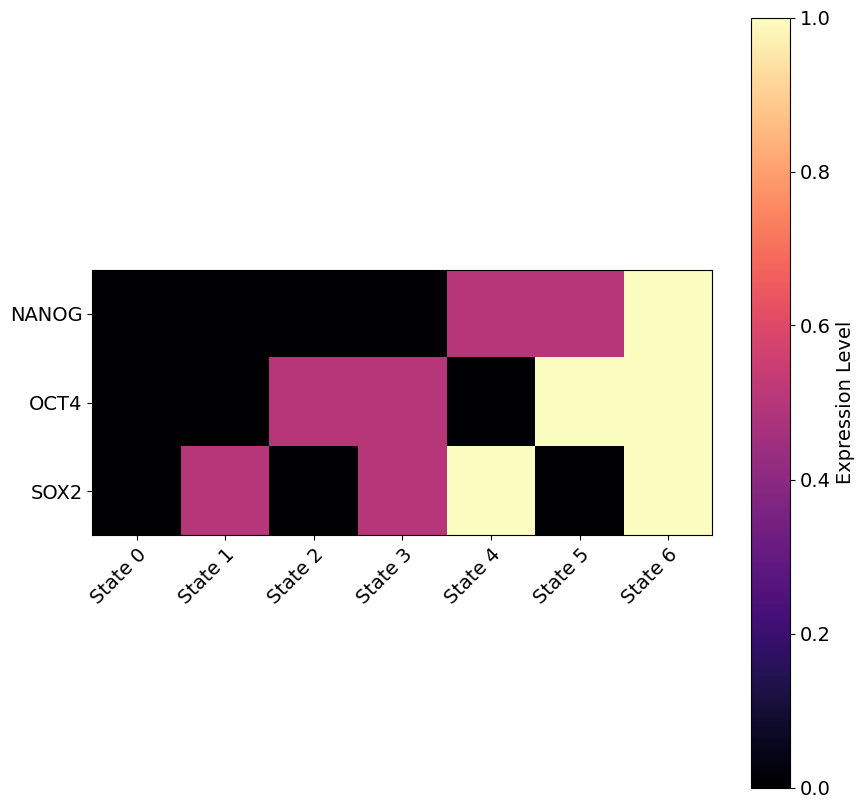

In [14]:
# Plot the eq'm solutions array for all non-input nodes of the network:
save_microarray_image = os.path.join(save_path, f'Microarray_{libg.name}_expresslevels_{node_express_levels}.png')
fig, ax = pnet.plot_sols_array(solsM_all,
                               gene_inds=pnet.noninput_node_inds,
                               figsave=save_microarray_image,
                               cmap=None,
                               save_format='png'
                               )

In [15]:
# Plotting the eq'm solutions array just focusing on the output nodes:
if len(pnet.output_node_inds): # not all networks have effector nodes, so we need to check
    save_microarray_image = os.path.join(save_path, f'Microarray_{libg.name}_expresslevels_{node_num_max}_effectors.png')
    fig, ax = pnet.plot_sols_array(solsM_all,
                                   gene_inds=pnet.output_node_inds,
                                   figsave=save_microarray_image,
                                   cmap=None,
                                   save_format='png'
                                   )

### Step 4: Creating the NFSM edges
Next we show how to run the time-simulation-based routine, [create_transition_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L325) of StateMachine, to build both of the NFSM types for the GRN model.

In [16]:
# Create the edges of the transition network:
# NOTE: for large GRNs such as the MAPK_net, this process can take an extraordinarily long time to compute (~60 mins).
dt = 5.0e-3 # Time step used in the simulations
dt_samp = 0.1 # Time at which samples are taken (must be larger than dt)
delta_sig = 60.0 # Time period representing how long each phase of the temporal test sequence is applied
t_relax = 20.0  # Time period to omit when sampling the phase to determine the state (must be shorter than delta_sig)
match_tol = 0.1 # Match tolerance for the found state to a state in solsM_all
verbose = False # Recieve output from the method while it's still solving (True)? 

# path to save the NFSM edges file: 
save_graph_file = os.path.join(save_path, f'network_{libg.name}.gml')

transition_edges_set, pert_edges_set, G_nx = smach.create_transition_network(states_dict,
                                                                             sig_test_set,
                                                                             solsM_all,
                                                                             charM_all,
                                                                             dt=dt,
                                                                             delta_sig=delta_sig,
                                                                             t_relax=t_relax,
                                                                             dt_samp=dt_samp,
                                                                             verbose=verbose,
                                                                             match_tol=match_tol,
                                                                             d_base=dd,
                                                                             n_base=n_base,
                                                                             beta_base=bb,
                                                                             remove_inaccessible_states=False,
                                                                             save_graph_file=save_graph_file,
                                                                             )


### Step 5
We next show how to save the NFSM graphs, and to use the [plot_state_transition_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L676) method of StateMachine to plot the 'general' NFSM (G-NFSM) and the [plot_state_perturbation_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L759) method of StateMachine to plot the event-driven NFSM (E-NFSM).

In [17]:
# Export plots of the NFSMs to image files. NOTE that 'svg' or 'png' formats can be exported just by
# changing the file name to the desired file type. 

mono_edge = False # Merge edges of the NFSM into one edge if they are headed in similar directions 

nodes_list = list(G_nx.nodes())
edges_list = list(G_nx.edges)

# Export the G-NFSM:
save_transition_net_image = os.path.join(save_path, f'General_NFSM_{libg.name}.png')
G_gv = smach.plot_state_transition_network(nodes_list,
                                           edges_list,
                                           smach._charM_all,
                                           save_file=save_transition_net_image,
                                           graph_layout='dot',
                                           mono_edge=mono_edge,
                                           constraint=True,
                                           concentrate=False,
                                           rank='same'
                                           )


# Export the E-NFSM (NOTE: in models without memory, the E-NFSM is blank/empty):
save_perturbation_net_image = os.path.join(save_path, f'Event_NFSM_{libg.name}.png')
G_pert = smach.plot_state_perturbation_network(pert_edges_set,
                                               smach._charM_all,
                                               nodes_listo=nodes_list,
                                               save_file=save_perturbation_net_image,
                                               graph_layout='dot',
                                               mono_edge=mono_edge,
                                               constraint=True,
                                               concentrate=False,
                                               rank='same'
                                               )



### Step 6
Finally, we show how to test the results of the NFSMs by running time-based simulations with a particular sequence of applied inputs to drive the system through the network, where stable states are automatically detected and matched by the Cellnition program. We do this using the [sim_time_trajectory](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L585) method of StateMachine. We show how the StateMachine method [plot_time_trajectory](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/state_machine.py#L888) can be used to visualize the results of the temporal simulation.  

In [29]:
# Simulate a time trajectory for the monostable system. 
# Note that the follow requires one to have knowledge of the NFSM, specifically how inputs are expected to 
# drive the system from one state to another, and also the dynamics of the state. 
# The following are for the StemCellTriadChain model 

starting_state = 3 # State to start the system off in
input_list = ['I4', 'I3', 'I4'] # Input states that will be applied in time, each held for a period of delta_sig
match_unique = True # match only to known states
dt = 5.0e-3 # Time step used in the simulations
dt_samp = 0.1 # Time at which samples are taken (must be larger than dt)
delta_sig = 60.0 # Time period representing how long each phase of the temporal test sequence is applied
t_relax = 20.0  # Time period to omit when sampling the phase to determine the state (must be shorter than delta_sig)
match_tol = 0.1 # Match tolerance for the found state to a state in solsM_all
verbose = True # Recieve output from the method while it's still solving (True)? 
time_wobble = 0.0 # Add a random amount of time sampled from 0.0 to time_wobble to the delta_sig value 


tvectr, c_time, matched_states, phase_inds = smach.sim_time_trajectory(starting_state,
                                                            smach._solsM_all,
                                                            input_list,
                                                            smach._sig_test_set,
                                                            dt=dt,
                                                            dt_samp=dt_samp,
                                                            input_hold_duration=delta_sig,
                                                            t_wait=t_relax,
                                                            verbose=verbose,
                                                            match_tol=match_tol,
                                                            d_base=dd,
                                                            n_base=n_base,
                                                            beta_base=bb,
                                                            time_wobble = time_wobble
                                                            )



Phase 0 state matched to State 3 with input I4
Phase 1 state matched to State 0 with input I3
Phase 2 state matched to State 0 with input I4


#### Understanding the output:

- tvectr : the sampled time steps of the simulation
- c_time : concentration of all nodes of the GRN in the time simulation
- phase_inds : indices in c_time and tvectr where the applied input signal changes
- matched_states : auto-determined steady or periodic states that are matched to those in solsM_all 

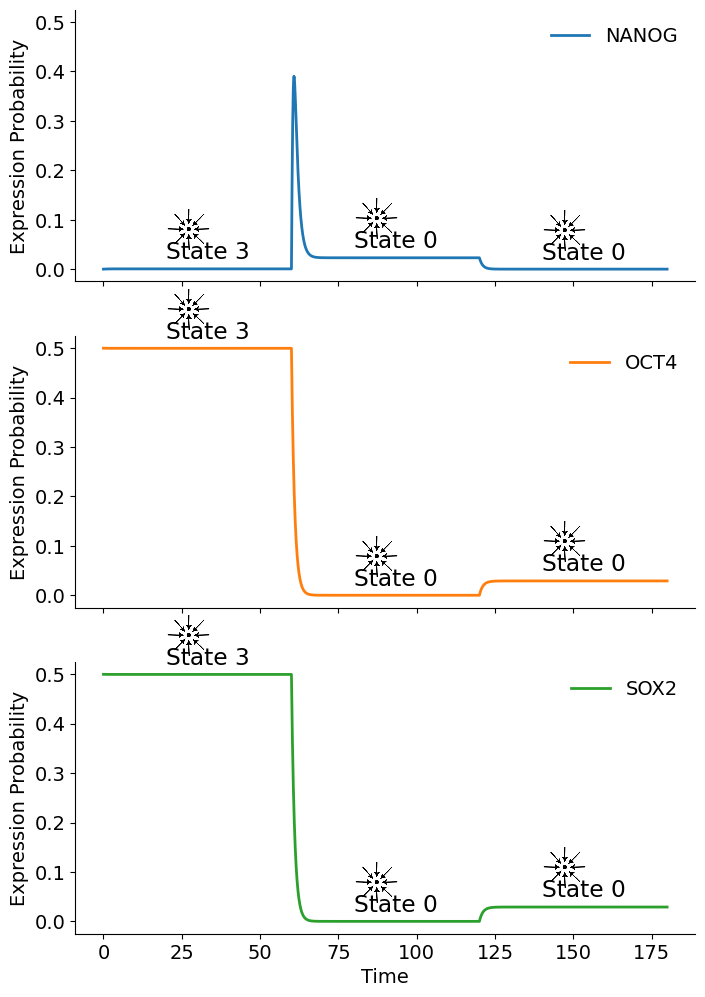

In [30]:
gene_plot_inds = [0, 1, 5]
figsize = (8, 4)
state_label_offset = 0.02
glyph_zoom = 0.15
glyph_alignment=(-0.0, -0.15)
fontsize='large'

savefig = os.path.join(save_path, f'time_traj_{libg.name}.png')

fig, ax = smach.plot_time_trajectory(c_time, 
                                          tvectr, 
                                          phase_inds,
                             matched_states,
                             smach._charM_all,
                             gene_plot_inds=gene_plot_inds,
                             figsize=figsize,
                             state_label_offset=state_label_offset,
                             glyph_zoom=glyph_zoom,
                             glyph_alignment=glyph_alignment,
                             fontsize=fontsize,     
                             save_file=savefig)

plt.savefig(savefig, dpi=300, transparent=True, format='png')